# The best place for a new oil well
As a Data Scientist for the OilyGiant mining company, our task is to find the best place for a new well.
Steps to choose the location:
Collect the oil well parameters in the selected region: oil quality and volume of reserves;
Build a model for predicting the volume of reserves in the new wells;
Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.
Data on wells from three regions have been provided. Parameters of each oil well in the region are already known. We will build a model that will help to pick the region with the highest profit margin. In the end, we will analyze potential profit and risks using the Bootstrapping technique.

## Get, explore and prepare data
In this section, all necessary Python packages and dataframes will be loaded. Then dataframes will be explored for possible problems and summary statistics will be visualized to get familiarized with data.

### Required Python Packages

In [1]:
# necessary Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load data and check for problems

In [2]:
# load data and explore
try:
    df0=pd.read_csv('/datasets/geo_data_0.csv')
    display(df0.head(2))
    df1=pd.read_csv('/datasets/geo_data_1.csv')
    display(df1.head(2))
    df2=pd.read_csv('/datasets/geo_data_2.csv')
    display(df2.head(2))
except:
    print('Make sure paths and files are correct!')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


In [3]:
display(df0.info())
print('='*50)
display(df1.info())
print('='*50)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df0=df0.drop('id', axis=1)
display(df0.head(2))
df1=df1.drop('id', axis=1)
display(df0.head(2))
df2=df2.drop('id', axis=1)
display(df0.head(2))

,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062
1,1.334711,-0.340164,4.36508,73.037750


,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062
1,1.334711,-0.340164,4.36508,73.037750


,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062
1,1.334711,-0.340164,4.36508,73.037750


In [5]:
#function that check number of missing values and their percentages in each column
def missing_data(list_of_dfs, list_of_names):
    for i in range(len(list_of_dfs)):
        df=list_of_dfs[i]
        col_names=df.columns.tolist()
        na_per_col=df.isna().sum().tolist()
        na_percentage=(df.isna().sum()/len(df)*100).tolist()
        print('='*20, 'Missing values of', list_of_names[i], '='*20)
        display(pd.DataFrame((na_per_col, na_percentage), index=['Number of missings', '% of missings'], columns=col_names)\
                .style.background_gradient(axis=1))

#apply the function
missing_data([df0, df1, df2], ['df0', 'df1', 'df2'])

==================== Missing values of df0 ====================


,f0,f1,f2,product
Number of missings,0,0,0,0
% of missings,0,0,0,0


==================== Missing values of df1 ====================


,f0,f1,f2,product
Number of missings,0,0,0,0
% of missings,0,0,0,0


==================== Missing values of df2 ====================


,f0,f1,f2,product
Number of missings,0,0,0,0
% of missings,0,0,0,0


### Descriptive statistis and Correlations 

In [6]:
#a loop that checks for summary statistics of each dataframe
list_of_dfs=[df0, df1, df2]
list_of_names=['df0', 'df1', 'df2']
for i in range(len(list_of_dfs)):
    print('='*20, list_of_names[i], '='*20)
    display(list_of_dfs[i].describe())

==================== df0 ====================


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


==================== df1 ====================


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


==================== df2 ====================


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [7]:
#a loop that checks for correlation between columns of each dataframe
for i in range(len(list_of_dfs)):
    print('='*20, list_of_names[i], '='*20)
    display(list_of_dfs[i].corr().round(2).style.background_gradient(cmap='coolwarm'))

==================== df0 ====================


,f0,f1,f2,product
f0,1,-0.44,-0,0.14
f1,-0.44,1,0,-0.19
f2,-0,0,1,0.48
product,0.14,-0.19,0.48,1


==================== df1 ====================


,f0,f1,f2,product
f0,1,0.18,-0,-0.03
f1,0.18,1,-0,-0.01
f2,-0,-0,1,1
product,-0.03,-0.01,1,1


==================== df2 ====================


,f0,f1,f2,product
f0,1,0,-0,-0
f1,0,1,0,-0
f2,-0,0,1,0.45
product,-0,-0,0.45,1


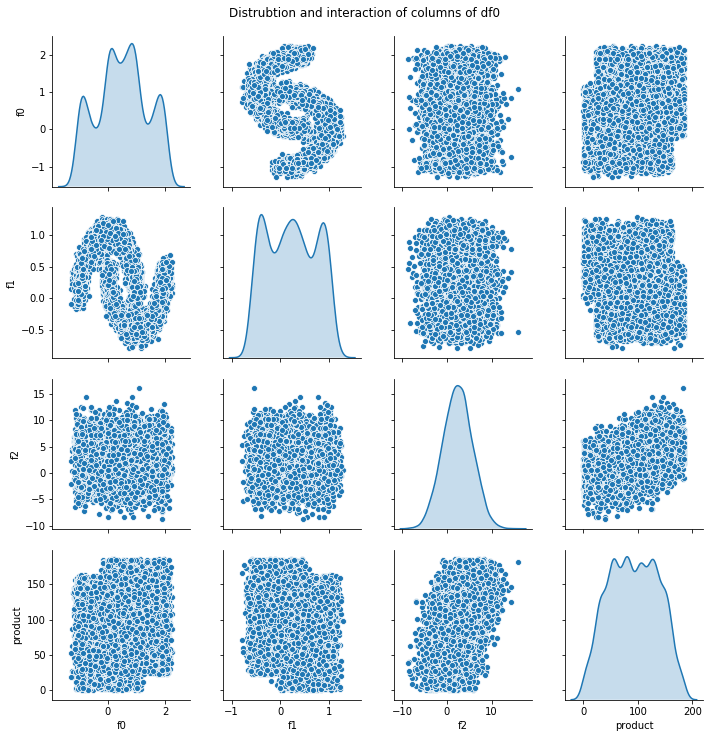

In [8]:
#visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(df0.sample(frac=0.1), diag_kind='kde')
plt.suptitle('Distrubtion and interaction of columns of df0', y=1.02)
plt.show()

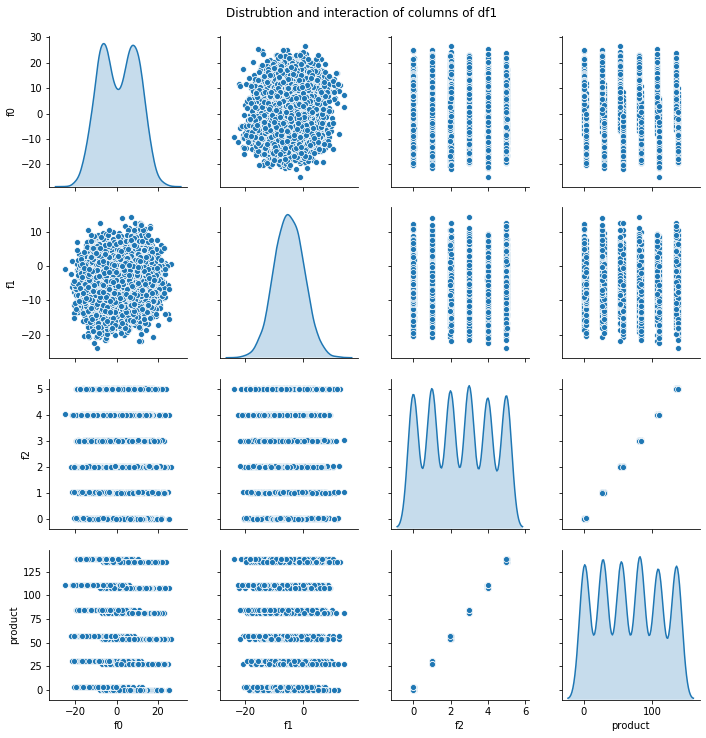

In [9]:
#visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(df1.sample(frac=0.1), diag_kind='kde')
plt.suptitle('Distrubtion and interaction of columns of df1', y=1.02)
plt.show()

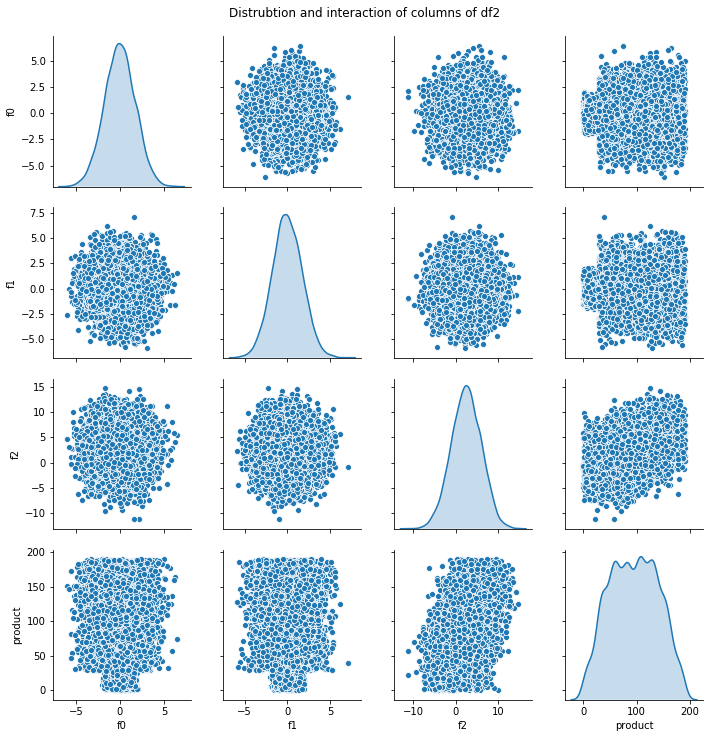

In [10]:
#visualize distribution and interaction of columns in each dataframe
# data is too big, to save computational time, get only small fraction of the data
sns.pairplot(df2.sample(frac=0.1), diag_kind='kde')
plt.suptitle('Distrubtion and interaction of columns of df2', y=1.02)
plt.show()

### Conclusion
Three dataframes containing historical data of separate regions have been loaded and the following observations made:
- All datasets consisted of `5 columns and 100000 rows`;
- No missing values and data type problems have been observed;
- **id** column of all datasets has been dropped since they will not add any value to predictions.
- **The f2** usually has a higher correlation with the **product** column compared to other columns. Especially, in dataset 1 (df1) it is a perfect positive correlation.
- The distribution of the values in the **product** columns of datasets (regions) were not similar. Df0 and Df2 have a normal distribution, while df1 has a kind of sinusoidal distribution.

## Train and test the model for each region:
In this section, each dataframe will be:
- seperated into target and features datasets, subsequently splitting them into training and validation sets.
- the features will be scaled.
- Then Linear Regerssion model will be trained and validated
- Average product volume and root mean sqaure error (RMSE) will be calculated at the end.

For this purpose, we will build and use our function rather than repeating same steps for each dataset.

In [11]:
def split_scale_fit_predict(df, col):
    #prepare features and target columns
    features=df.drop(col, axis=1)
    target=df[col]
    
    #split for training and validation set (75:25 ratio)
    features_train, features_valid, target_train, target_valid =\
        train_test_split(features, target, test_size=0.25, random_state=234)
    
    #scale columns
    scaler=StandardScaler()
    features_train=scaler.fit_transform(features_train)
    features_valid=scaler.transform(features_valid)
    
    #build Linear Regression Model and train it
    model=LinearRegression().fit(features_train, target_train)
    
    
    #predict volume of product for validation set
    pred=pd.Series(model.predict(features_valid), index=target_valid.index)
    
    return target_valid, pred

### Region0 (df0)

In [12]:
#apply above function to get target_validation and predicted values
tar_df0, pred_df0 = split_scale_fit_predict(df0, 'product')

#calculate and print necessary metrics
print('Average actual volume is', tar_df0.mean())
print('Average predicted volume is', pred_df0.mean())
print('RMSE value is', mean_squared_error(tar_df0, pred_df0)**0.5)
print('R2 score is', r2_score(tar_df0, pred_df0))

Average actual volume is 92.36085330953247
Average predicted volume is 92.47655702759756
RMSE value is 37.64206704150026
R2 score is 0.27436770467038707


### Region1 (df1)

In [13]:
#apply the same steps as previous step but for df1
tar_df1, pred_df1 = split_scale_fit_predict(df1, 'product')

#calculate and print necessary metrics
print('Average actual volume is', tar_df1.mean())
print('Average predicted volume is', pred_df1.mean())
print('RMSE value is', mean_squared_error(tar_df1, pred_df1)**0.5)
print('R2 score is', r2_score(tar_df1, pred_df1))

Average actual volume is 69.30635483321599
Average predicted volume is 69.31473093245673
RMSE value is 0.886597711414206
R2 score is 0.9996279169040658


### Region2 (df2)

In [14]:
#apply the same steps as previous step but for df2
tar_df2, pred_df2 = split_scale_fit_predict(df2, 'product')

#calculate and print necessary metrics
print('Average actual volume is', tar_df2.mean())
print('Average predicted volume is', pred_df2.mean())
print('RMSE value is', mean_squared_error(tar_df2, pred_df2)**0.5)
print('R2 score is', r2_score(tar_df2, pred_df2))

Average actual volume is 94.93509148016737
Average predicted volume is 94.87867178765184
RMSE value is 40.03011901988634
R2 score is 0.20154228377659922


### Conclusion
Linear Regression Model has been built and tested for data of each region. Follow observations has been obtained:

|Region |Actual Avg.Vol|Predicted Avg.Vol|RMSE     |R-sqaured|
|-------|--------------|-----------------|---------|---------|
|Region0|92.36         |92.47            |37.64    |0.27     |
|Region1|69.30         |69.31            |0.88     |0.99     |
|Region2|94.93         |94.87            |40.03    |0.20     |

For **Region1, the model has very high accuracy (r-squared=0.99) and very low error (RMSE=&#xB1;0.88)**. The model "perfectly" predicted the values. However, this was obvious, because we observed a perfect correlation between **f2 variable and product volume** in the previous section. (This data looks suspicious, results should be discussed with oil experts and data engineers!).

For other regions, model accuracy is relatively low **(0.27 and 0.20)**, predictions with errors of **&#xB1;37.64 and &#xB1;40.03 thousand barrels**, which looks quite high!

## Prepare for profit calculation:
Here we will obtain all necessary values from the description of the project and assign them to variables, we will use them in the coming tasks. And we will calculate a minimum volume of the product that should be obtained in order for the company does not have a loss.

In [15]:
#assigns necessary values to variables
#number of wells that should be considered
ALL_POINTS=500

#best 200 profitable wells
PRFTBL_POINTS=200

#cost of development of 200 wells
COST_OF_200_WELLS=100000000

#cost of development of only one well
COST_OF_ONE_WELL=COST_OF_200_WELLS/PRFTBL_POINTS

#cost of product for one unit (thsnd barrels)
REVENUE_PER_UNIT=4500

#without losses means, revenue>=cost_of_well
volume=COST_OF_ONE_WELL/REVENUE_PER_UNIT
print('A well should produce at least', round(volume, 2), 'thousand barrels in order to be lossless.')

A well should produce at least 111.11 thousand barrels in order to be lossless.


### Conclusion
**In order to be profitable, a well should produce at least 111.11 thousand barrels of the product**. In previous sections, we observed that the average production volume of all regions was quite low (e.g. 92.36, 69.30, 94.93 k barrels). But that does not necessarily mean, wells are not profitable. In order to check the profitability of wells, we need to find out the distribution of profits of wells, especially best-performing wells. This is what we are going to do in the next section.

## Profit calculating function:
Here we will build a function, which takes a set of wells with the highest predicted volume of product and then it calculates total profit for the set of wells using the actual volume of the product.

In [16]:
#define the function
def profit_calc(target, predictions, best):
    pred_vol = predictions.sort_values(ascending=False)
    tar_vol = target[pred_vol.index][:best]
    total_revenue = tar_vol.sum() * REVENUE_PER_UNIT
    profit= (total_revenue - (COST_OF_ONE_WELL * best))/10**6
    #print(len(tar_vol))
    return profit

#test the function
test=profit_calc(tar_df0, pred_df0, 200)
print(test)

30.736465633039504


## Risk and profit for each region
In this section we will take random 500 wells from the validation set, then using our function from the previous section, we will calculate the total profit for the best 200 wells. This process should be repeated 1000 times (bootstrapping). Total profits for 200 wells obtained by bootstrapping will be analyzed for the confidence interval, risk and distribution.

First, we will define a function and use for each regions data!

In [17]:
def bootstrap_profit_calc(tar, pred):
    #random
    state = np.random.RandomState(234)
    profits=[]
    
    #bootstrap
    for i in range(1000):
        target_subsample = tar.sample(n=ALL_POINTS, replace=True, random_state=state)
        pred_subsample=pred[target_subsample.index]
        
        #apply profit_calc function to calculate profit of 200 wells
        profit= profit_calc(target_subsample, pred_subsample, PRFTBL_POINTS)
        
        #append the calcualted profit to the list
        profits.append(profit)
        
    #convert list to pd.Series and calculate
    profits=pd.Series(profits)
    
    #mean
    avg_profit=round(profits.mean(), 3)
    
    #95% confidence interval
    conf_int=(round(profits.quantile(0.025), 3), round(profits.quantile(0.975)))
    
    #risk
    risk=round(sum(profits<0)/len(profits), 3)
    
    #print all values
    print('Average profit from 200 wells is:', avg_profit, 'Million USD')
    print('95% confidence interval for the obtained average is:',conf_int, 'Million USD')
    print('Percentge of risk, with negative profit is:{:.2%}'.format(risk))

### Region0 profit distribution

In [18]:
bootstrap_profit_calc(tar_df0, pred_df0)

Average profit from 200 wells is: 4.584 Million USD
95% confidence interval for the obtained average is: (-0.211, 10) Million USD
Percentge of risk, with negative profit is:3.30%


### Region1 profit distribution

In [19]:
bootstrap_profit_calc(tar_df1, pred_df1)

Average profit from 200 wells is: 5.357 Million USD
95% confidence interval for the obtained average is: (1.281, 10) Million USD
Percentge of risk, with negative profit is:0.30%


### Region2 profit distribution

In [20]:
bootstrap_profit_calc(tar_df2, pred_df2)

Average profit from 200 wells is: 3.935 Million USD
95% confidence interval for the obtained average is: (-1.87, 10) Million USD
Percentge of risk, with negative profit is:8.70%


### Conclusion
Using 1000 bootstrapping cycles, out of random 500 wells, 200 wells with the highest predictions were selected and profit has been calculated. Following observations were obtained:

|Region |Avg. Profit (mln USD)|95 % Conf. Interval (mln USD)|Risk (%) |
|-------|---------------------|-----------------------------|---------|
|Region0|4.58                 |-0.211 - 10                  |3.30     |
|Region1|5.36                 |1.281 - 10                   |0.30     |
|Region2|3.94                 |-1.87  - 10                  |8.70     |

Based on the above observations, **region1 has the highest profit** and the least risk (only 0.3%). Other regions have lesser profits and higher risks, particularly, region2 has comparably very low profit (3.94 mln USD) and higher risk (8.7%).

With less risk and higher profit, **region1 looks more promising, compared to region0 and region2**.

## Overall Summary

1. Three dataframes containing historical data of separate regions have been loaded with `5 columns and 100000 rows` each. Missing values and data type problems have not been observed. **id** column of all datasets has been dropped since they will not add any value to predictions. **The f2** usually has a higher correlation with the **product** column compared to other columns. Especially, in dataset 1 (df1) it is a perfect positive correlation. The distribution of the values in the **product** columns of datasets (regions) were not similar. Df0 and Df2 have a normal distribution, while df1 has a kind of sinusoidal distribution.

2. Linear Regression Model has been built and tested for data of each region. Follow observations has been obtained:

    |Region |Actual Avg.Vol|Predicted Avg.Vol|RMSE     |R-sqaured|
    |-------|--------------|-----------------|---------|---------|
    |Region0|92.36         |92.47            |37.64    |0.27     |
    |Region1|69.30         |69.31            |0.88     |0.99     |
    |Region2|94.93         |94.87            |40.03    |0.20     |

    For **Region1, the model has very high accuracy (r-squared=0.99) and very low error (RMSE=&#xB1;0.88)**. The model "perfectly" predicted the values. However, this was obvious, because we observed a perfect correlation between **f2 variable and product volume** in the previous section. (This data looks suspicious, results should be discussed with oil experts and data engineers!).

    For other regions, model accuracy is relatively low **(0.27 and 0.20)**, predictions with errors of **&#xB1;37.64 and &#xB1;40.03 thousand barrels**, which looks quite high!




3. **In order to be profitable, a well should produce at least 111.11 thousand barrels of the product**. In previous sections, we observed that the average production volume of all regions was quite low (e.g. 92.36, 69.30, 94.93 k barrels)




4. Using 1000 bootstrapping cycles, out of random 500 wells, 200 wells with the highest predictions were selected and profit has been calculated. Following observations were obtained:

    |Region |Avg. Profit (mln USD)|95 % Conf. Interval (mln USD)|Risk (%) |
    |-------|---------------------|-----------------------------|---------|
    |Region0|4.58                 |-0.211 - 10                  |3.30     |
    |Region1|5.36                 |1.281 - 10                   |0.30     |
    |Region2|3.94                 |-1.87  - 10                  |8.70     |

    Based on the above observations, **region1 has the highest profit** and the least risk (only 0.3%). Other regions have lesser profits and higher risks, particularly, region2 has comparably very low profit (3.94 mln USD) and higher risk (8.7%).

    With less risk and higher profit, **region1 looks more promising, compared to region0 and region2**.